># 지금까지 살펴본 이미지 식별의 문제점

- 과거의 이미지 식별에서는 이미지를 이미지로 다루지 않는다는 문제가 있음
- 단순히 화소 하나하나로 나열된 것을 식별하는 것이 아닌, 각각의 화소가 가로세로 방향으로 연결되어 어떤 형태를 만드는 과정을 고려할 필요가 있음
- 전결합층 신경망에서는 이를 전혀 고려하지 않음

___
># MNIST 데이터 세트 읽어들이기

- MNIST 데이터 세트는 TensorFlow 함수를 통해 쉽게 읽어들일 수 있음 (mnist 하위 폴더에 저장)

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


- 훈련전용 데이터는 `mnist.train`, 테스트 전용 데이터는 `mnist.test`로 참조 가능 (28X28, 784화소, 0~1 스케일)
- `.labels`에 각각의 레이블 리스트 저장

In [2]:
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [5]:
mnist.train.labels

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

Text(0.5, 1.05, 'gray-scale handwritting of 7\n')

<Figure size 432x288 with 0 Axes>

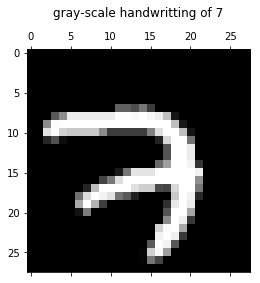

In [9]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(mnist.train.images[0].reshape(28,28))
plt.title('gray-scale handwritting of %d\n' % mnist.train.labels[0])

___
>## 전결합층만 사용한 신경망으로 식별하기